# Zuri Velo Counting

Exploring bike usage in Zurich during the years 2014, 2015, and 2016.

The data is taken from the Zurich opendata hub.

In [1]:
%matplotlib inline

import os
from urllib.request import urlretrieve

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
def get_velo_data(location, year=2016):
    URLS = {2016: "https://data.stadt-zuerich.ch/dataset/verkehrszaehlungen_werte_fussgaenger_velo/resource/ed354dde-c0f9-43b3-b05b-08c5f4c3f65a/download/2016verkehrszaehlungenwertefussgaengervelo.csv",
            2015: "https://data.stadt-zuerich.ch/dataset/verkehrszaehlungen_werte_fussgaenger_velo/resource/5c994056-eda6-48c5-8e61-28e96bcd04a3/download/2015verkehrszaehlungenwertefussgaengervelo.csv",
            2014: "https://data.stadt-zuerich.ch/dataset/verkehrszaehlungen_werte_fussgaenger_velo/resource/bd2c9dd9-5b05-4303-a4c9-4a9f5b73e8f7/download/2014verkehrszaehlungenwertefussgaengervelo.csv",
           }

    fname = "%i.csv" % year
    if not os.path.exists(fname):
        urlretrieve(URLS[year], fname)
        
    data = pd.read_csv(fname, parse_dates=True, index_col='Datum')

    # filter by location
    data = data[data.Standort == location]

    # subselect only the Velo data
    data = data[["Velo_in", "Velo_out"]]
    
    data['Total'] = data.Velo_in + data.Velo_out
    
    return data

# Fetch and load data

This fetches the data from the city of Zurich server and loads it into a pandas dataframe.

In [3]:
mythenquai16 = get_velo_data('ECO09113499', 2016)
mythenquai15 = get_velo_data('ECO09113499', 2015)
mythenquai14 = get_velo_data('ECO09113499', 2014)

mythenquai = mythenquai16.append(mythenquai15)
mythenquai = mythenquai.append(mythenquai14)

# rename for easier plotting
mythenquai.columns = ["North", "South", "Total"]

# Bike users per day and hour

Plotting the total bikes counted per week shows that more people cycle in the summer
months. In particular between July and September.

In [4]:
daily = mythenquai.resample('W').sum()
hourly = mythenquai.resample('H').sum()

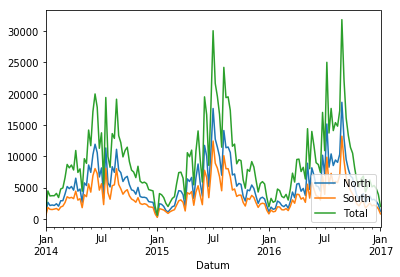

In [10]:
daily.plot()
plt.legend(loc='lower right');

## Average cyclists per hour

There is a clear pattern of peopel commuting into the city during the morning and returning
in the evening.

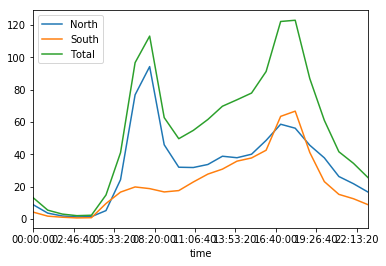

In [6]:
hourly.groupby(hourly.index.time).mean().plot()

In [7]:
mythenquai.sample(10)

,North,South,Total
Datum,,,
2014-08-12 10:30:00,6.0,12.0,18.0
2015-09-05 20:45:00,6.0,3.0,9.0
2014-06-10 18:45:00,48.0,40.0,88.0
2014-01-09 09:30:00,7.0,0.0,7.0
2015-03-16 10:00:00,4.0,2.0,6.0
2016-01-06 06:00:00,3.0,5.0,8.0
2016-07-04 18:30:00,33.0,29.0,62.0
2016-01-04 08:15:00,24.0,1.0,25.0
2015-06-19 05:45:00,3.0,14.0,17.0
